**Team 8**

Rahul Namadev Chavan : CB.EN.P2DSC21021

Vinayak M : CB.EN.P2DSC21029

## **Time Series Forecasting**

**Time Series:** A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

**Time Series Forecasting:** Time series forecasting is basically the machine learning modeling for Time Series data for predicting future values using Time Series modeling. Examples include forecasting of weather, sales numbers and stock prices.

**Importing required Libraries**

In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

**Downloading weather time series dataset**

Dataset is weather time series dataset recorded by the Max Planck Institute for Biogeochemistry. The dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes, beginning in 2003. We will use data collected between 2009 and 2016. 

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


**Reading the dataset and printing sample**

In [3]:
df = pd.read_csv(csv_path)
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


### **Each feature represents:**                                                      
 p (mbar) -> Atmospheric pressure in millibars                                                                     
 T (degC) -> Temperature in Celsius                                                                       
 Tpot (K) -> Temperature in Kelvin                                             
 Tdew (degC) -> Temperature in Celsius relative to humidity.                    
 rh (%) -> Relative Humidity                                                   
 VPmax (mbar) -> Saturation vapor pressure                                     
 VPact (mbar) -> Vapor pressure                                                
 VPdef (mbar) -> Vapor pressure deficit                                        
 sh (g/kg) -> Specific humidity                                                                      
 H2OC (mmol/mol) -> Water vapor concentration                                                                 
 rho (g/m**3) -> Airtight                                                                      
 wv (m/s) -> Wind speed                                                                         
 max. wv (m/s) -> Maximum wind speed                                                                         
 wd (deg) -> Wind direction in degrees                                         

**Sub-sampling the data from 10-minute intervals to 1-hour intervals since we will be looking into hourly predictions**

In [4]:
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
# Removing 'Date Time' column from the dataframe and taking it into another variable 'date_time' 
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

**Printing processed dataset sample**

In [5]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


**Plotting corresponding columns of Temperature, Atmospheric Pressure and Airtight from the dataset**

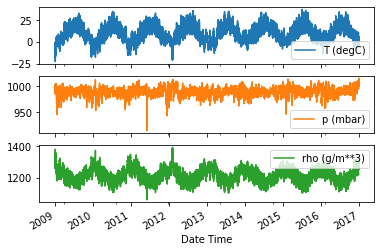

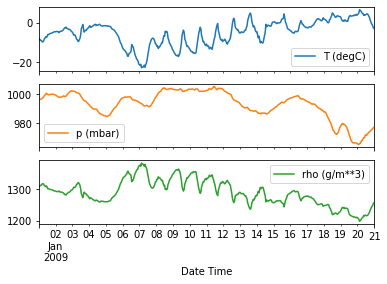

In [6]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# Potting particular range of values to view the fine details
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

**Printing basic statistical description of the dataset**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


From the statistical description of dataset, it can be found out that min and max value of wind velocity is -9999. This data is erroneous since velocity should be greater than 0 (there's a separate wind direction column). Hence these values are replaced with zeroes

In [8]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# Checking if inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

It is important to understand the data and be sure that appropriately formatted data is passed onto the model.

The last column of the data, wd (deg)—gives the wind direction in units of degrees. Angles do not make good model inputs: 360° and 0° should be close to each other and wrap around smoothly. Direction shouldn't matter if the wind is not blowing.

**Plotting 2D histogram plot of wind direction w.r.t wind velocity**

Text(0, 0.5, 'Wind Velocity [m/s]')

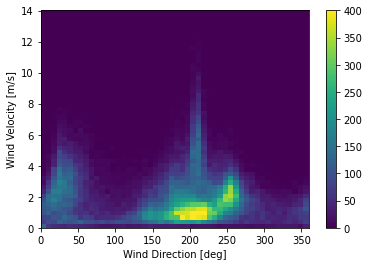

In [9]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

**Converting wind direction and velocity columns to a wind vector for better interpretation**

In [10]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Converting wind direction to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculating wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculating max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

**Plotting formatted 2D Histogram Plot of wind direction w.r.t wind velocity**

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

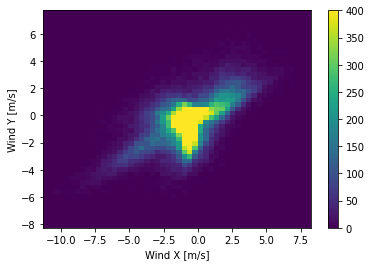

In [11]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

**Converting 'date_time' to list**

In [12]:
dt = date_time.tolist()
print(dt[0:10])
print(type(dt[0]))

[Timestamp('2009-01-01 01:00:00'), Timestamp('2009-01-01 02:00:00'), Timestamp('2009-01-01 03:00:00'), Timestamp('2009-01-01 04:00:00'), Timestamp('2009-01-01 05:00:00'), Timestamp('2009-01-01 06:00:00'), Timestamp('2009-01-01 07:00:00'), Timestamp('2009-01-01 08:00:00'), Timestamp('2009-01-01 09:00:00'), Timestamp('2009-01-01 10:00:00')]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


**Converting date and time to seconds**

In [13]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

5         1.230772e+09
11        1.230775e+09
17        1.230779e+09
23        1.230782e+09
29        1.230786e+09
              ...     
420521    1.483211e+09
420527    1.483215e+09
420533    1.483219e+09
420539    1.483222e+09
420545    1.483226e+09
Name: Date Time, Length: 70091, dtype: float64

Here, time in seconds is not a useful model input. Being weather data, it has daily and yearly periodicity. There are many possible ways to deal with periodicity. By using sine and cosine transforms to clear "Time of day" and "Time of year" signals, one can obtain usable signals

**Taking sin and cosine transform of time in seconds**

In [14]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

**Plotting sin and cosine transform of time in seconds**

Text(0.5, 1.0, 'Time of day signal')

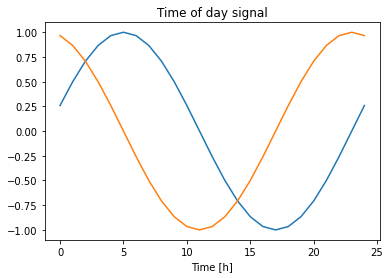

In [15]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

**Computing Fast Fourier Transform to determine which frequencies are important**

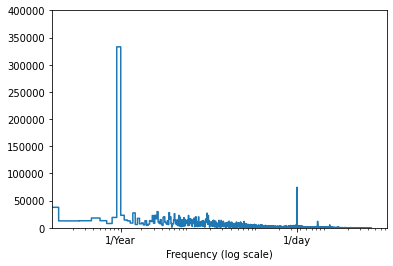

In [16]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### **Splitting the Data**
**Making 70%, 20%, 10% split for the training, validation, and test sets.**               
The data here is not being randomly shuffled before splitting because:               
a) It ensures that chopping the data into windows of consecutive samples is still possible.                                                                      
b) It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [17]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

**Normalizing the data**

Scaling features by subtracting the mean and dividing by the standard deviation of each feature

In [18]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

**Plotting the normalized data**

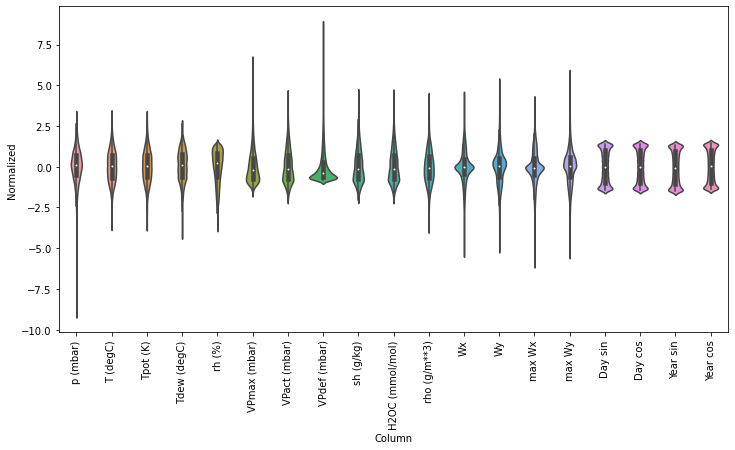

In [19]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

**Data windowing**                                                                   

Data windowing means to take a dataset and partition it into subsections. In traditional machine learning, more input data tends to be better. However, in time series data, it might not be the case. Hence data windowing is carried out.                                                                                  
Main features of the input windows are:                              

*   The width (number of time steps) of the input and label windows.
*   The time offset between them
*   Which features are used as inputs, labels, or both.

Windowing approach is used for
*   Single-output, and multi-output predictions.
*   Single-time-step and multi-time-step predictions.                             

**Creating a WindowGenerator class**

In [20]:
class WindowGenerator():
  #__init__ method includes all the necessary logic for the input and label indices.
  # Training, evaluation, and test DataFrames are taken as input. 
  #These will be converted to tf.data.Datasets of windows later.
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

Here we are creating 2 windows namely W1 and W2

Creating a window of input width 24, label width 1, shift 24 and label column 'T(degC)'.

This window can be used to make a single prediction 24 hours into the future, given 24 hours of history.

In [21]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

Creating a window of input width 6, label width 1, shift 1 and label column 'T(degC)'.

This window can be used to make a prediction one hour into the future, given six hours of history,.



In [22]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

**Defining a function split_window where, given a list of consecutive inputs, the function will convert them to a window of inputs and a window of labels.**

In [23]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

**Trying out the split_window function**

Here, the example window gets splitted into window of inputs and window of labels.

A batch of three 7-time step windows with 19 features at each time step is taken here. It is then splitted into a batch of 6-time step 19-feature inputs, and a 1-time step 1-feature label.

In [24]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


### Plot
The plot method below gives a simple visualization of the split window

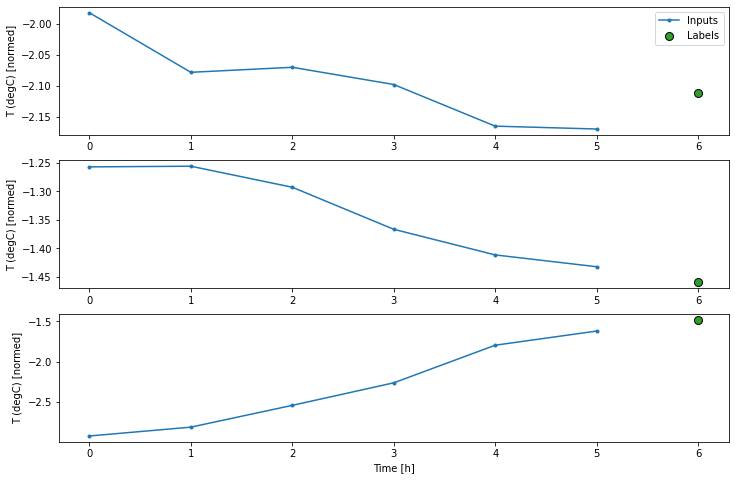

In [25]:
w2.example = example_inputs, example_labels

def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

w2.plot()
#Based on the time that the item corresponds to, this plot aligns inputs, labels, and (later) predictions.

Other columns can be also plotted, but w2 window configuration only has labels for the T (degC) column.

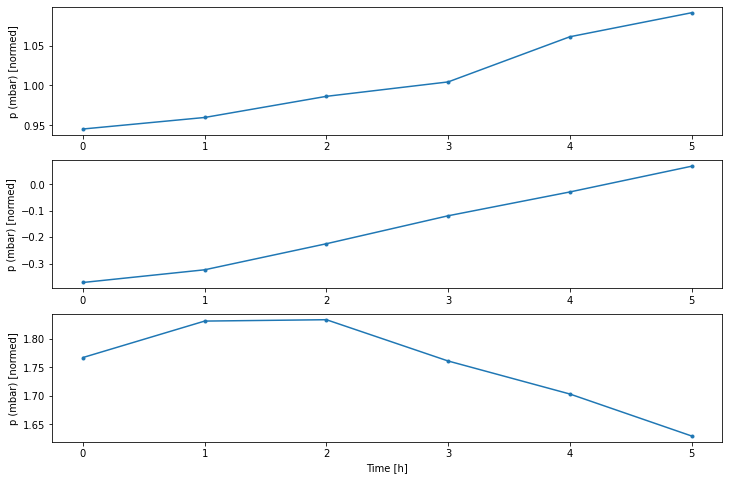

In [26]:
w2.plot(plot_col='p (mbar)')

Defining a function make_datasets. This function will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using tf.keras.utils.timeseries_dataset_from_array function

In [27]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

Object 'WindowGenerator' holds training, validation, and test data.                       
Adding properties for accessing them as tf.data.Datasets using the make_dataset function that was defined earlier.
 

In [28]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Access to the tf.data.Dataset objects is provided through the WindowGenerator object, so that one can easily iterate over the data

Dataset.element_spec property gives the structure, data types, and shapes of the dataset elements.

In [29]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a Dataset yields concrete batches

In [30]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


###**Single step models**
Predicts a single feature's value—1 time step (one hour) into the future based only on the current conditions.

Configuring WindowGenerator object to produce single-step (input, label) pairs:

In [31]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [32]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


Constructing a wider WindowGenerator that generates windows 24 hours of consecutive inputs and labels at once. The model's behaviour is unaffected by the new wide window variable. Based on a single input time step, the model continues to make predictions up to one hour in the future.

In [33]:
# To make the time axis acts like the batch axis: 
# each prediction is made independently with no interaction between time steps:

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [34]:
print('Input shape:', wide_window.example[0].shape) #Printing shape of wide_window 

Input shape: (32, 24, 19)


### **Linear Model**
By inserting linear transformation between the input and output, the simplest trainable model can be created.The output from a time step only depends on that step.

A tf.keras.layers.Dense layer with no activation set is a linear model.

In [35]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [36]:
MAX_EPOCHS = 100  # maximum epochs are set to 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

**Training the model and evaluating its performance**

In [37]:
history = compile_and_fit(linear, single_step_window)

print(linear.evaluate(single_step_window.val))
print(linear.evaluate(single_step_window.test, verbose=0))

Epoch 1/100
1534/1534 [==============================] - 12s 7ms/step - loss: 0.1027 - mean_absolute_error: 0.2089 - val_loss: 0.0149 - val_mean_absolute_error: 0.0926
Epoch 2/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0812 - val_loss: 0.0098 - val_mean_absolute_error: 0.0739
Epoch 3/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0725 - val_loss: 0.0092 - val_mean_absolute_error: 0.0713
Epoch 4/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0712 - val_loss: 0.0090 - val_mean_absolute_error: 0.0702
Epoch 5/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0708 - val_loss: 0.0094 - val_mean_absolute_error: 0.0723
Epoch 6/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0706 - val_loss: 0.0089 - val_mean_absolute_error: 0.07

**Plotting example predictions on the wide_window**

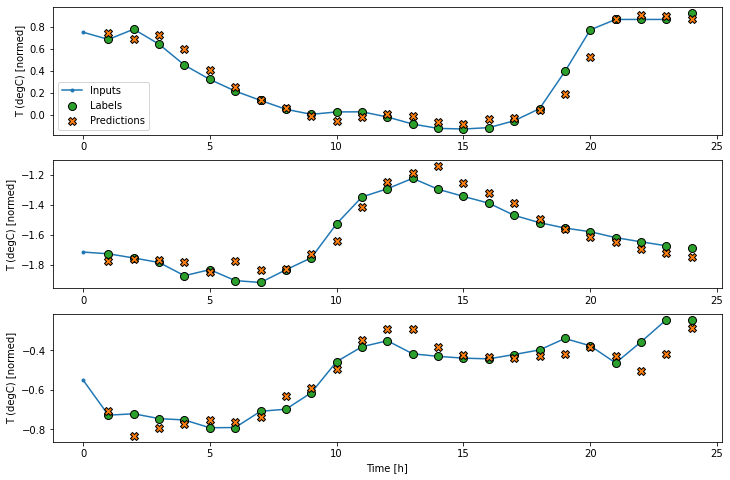

In [38]:
wide_window.plot(linear)

**Dense Model**

Stacking few Dense layers and are added between the input and the output

In [39]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

Epoch 1/100
1534/1534 [==============================] - 11s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0794 - val_loss: 0.0076 - val_mean_absolute_error: 0.0637
Epoch 2/100
1534/1534 [==============================] - 11s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0644 - val_loss: 0.0071 - val_mean_absolute_error: 0.0612
Epoch 3/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0618 - val_loss: 0.0072 - val_mean_absolute_error: 0.0617
Epoch 4/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0599 - val_loss: 0.0069 - val_mean_absolute_error: 0.0602
Epoch 5/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0597 - val_loss: 0.0066 - val_mean_absolute_error: 0.0567
Epoch 6/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0583 - val_loss: 0.0065 - val_mean_absolute_error: 0.0

In [40]:
print(dense.evaluate(single_step_window.test, verbose=0)) #Printing the performance

[0.006760233081877232, 0.058203861117362976]


**Multi-step Dense Model**

Since single-time-step model has no context for the current values of its inputs, multiple time steps are accessed when making predictions in this model.

This model will take multiple time steps as input to produce a single output.


In [41]:
#Creating a WindowGenerator that will produce batches of three-hour inputs and one-hour labels:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

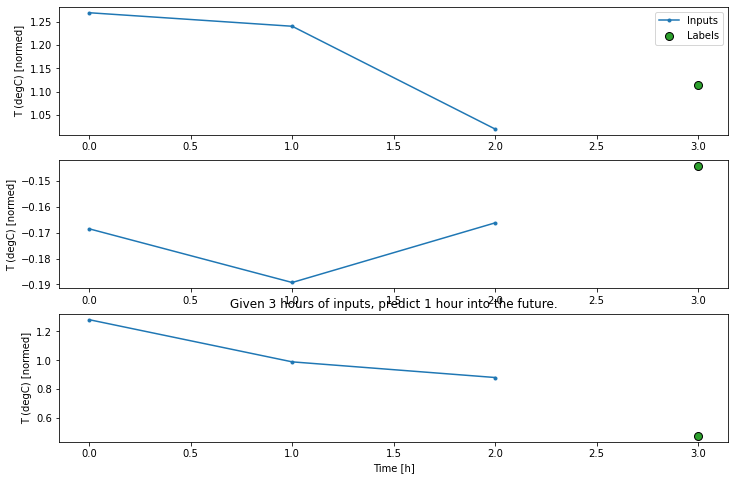

In [42]:
conv_window.plot() #plotting conv_window
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

**Dense model on a multiple-input-step window can be trained by adding a tf.keras.layers.Flatten as the first layer of the model.**

In [43]:
dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [44]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [45]:
history = compile_and_fit(dense, conv_window)

Epoch 1/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.1008 - val_loss: 0.0091 - val_mean_absolute_error: 0.0708
Epoch 2/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0666 - val_loss: 0.0069 - val_mean_absolute_error: 0.0596
Epoch 3/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0622 - val_loss: 0.0064 - val_mean_absolute_error: 0.0563
Epoch 4/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0600 - val_loss: 0.0063 - val_mean_absolute_error: 0.0565
Epoch 5/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0595 - val_loss: 0.0080 - val_mean_absolute_error: 0.0670
Epoch 6/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0584 - val_loss: 0.0063 - val_mean_absolute_error: 0.056

In [46]:
dense.evaluate(conv_window.test, verbose=0) # Model Evaluation

[0.006164009682834148, 0.05602998286485672]

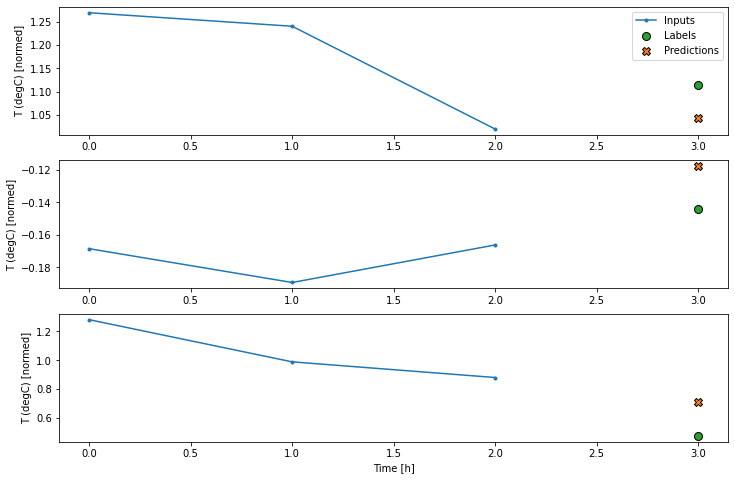

In [47]:
conv_window.plot(dense) # plotting prediction

**Convolution neural network**                                                     

Convolution layer takes multiple time steps as input to each prediction.


In [48]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

Running it on an example batch to check if model produces outputs with the expected shape

In [49]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


Train and evaluate model on the conv_window

In [50]:
history = compile_and_fit(conv_model, conv_window)

Epoch 1/100
1534/1534 [==============================] - 20s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0920 - val_loss: 0.0084 - val_mean_absolute_error: 0.0676
Epoch 2/100
1534/1534 [==============================] - 11s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0665 - val_loss: 0.0071 - val_mean_absolute_error: 0.0605
Epoch 3/100
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0629 - val_loss: 0.0104 - val_mean_absolute_error: 0.0740
Epoch 4/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0611 - val_loss: 0.0066 - val_mean_absolute_error: 0.0567
Epoch 5/100
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0600 - val_loss: 0.0063 - val_mean_absolute_error: 0.0548
Epoch 6/100
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0592 - val_loss: 0.0068 - val_mean_absolute_error: 

In [51]:
print(conv_model.evaluate(conv_window.test, verbose=0)) # Model Evaluation

[0.006204983219504356, 0.055748894810676575]


Running the model on wider input, produces wider output.

In [52]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


Here, the output is shorter than the input. 
 To make training or plotting work, the labels, and prediction should
 have the same length. 
 So build a WindowGenerator to produce wide windows with a few extra input 
 time steps so the label and prediction lengths match.

In [53]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [54]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


**Plotting the model's predictions on a wider window**                                
Every prediction here is based on the 3 preceding time steps

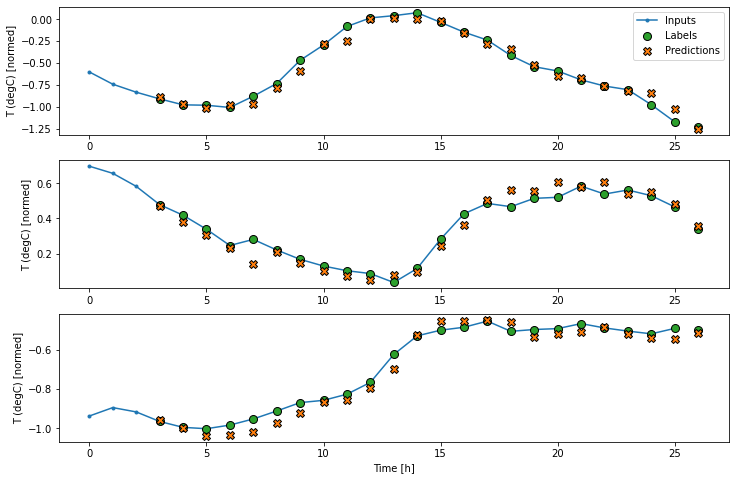

In [55]:
wide_conv_window.plot(conv_model)

 **Long Short-Term Memory**

 By setting return_sequences=True, the model can be trained on 24 hours of data at a time.

In [56]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [57]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [58]:
history = compile_and_fit(lstm_model, wide_window) #compiling the model

Epoch 1/100
1533/1533 [==============================] - 14s 8ms/step - loss: 0.0208 - mean_absolute_error: 0.0865 - val_loss: 0.0064 - val_mean_absolute_error: 0.0562
Epoch 2/100
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0553 - val_loss: 0.0059 - val_mean_absolute_error: 0.0529
Epoch 3/100
1533/1533 [==============================] - 12s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0532 - val_loss: 0.0057 - val_mean_absolute_error: 0.0515
Epoch 4/100
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0523 - val_loss: 0.0057 - val_mean_absolute_error: 0.0520
Epoch 5/100
1533/1533 [==============================] - 12s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0517 - val_loss: 0.0056 - val_mean_absolute_error: 0.0514
Epoch 6/100
1533/1533 [==============================] - 13s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0512 - val_loss: 0.0055 - val_mean_absolute_error:

In [59]:
print(lstm_model.evaluate(wide_window.test, verbose=0)) #Model Evaluation

[0.005487507209181786, 0.05183999612927437]


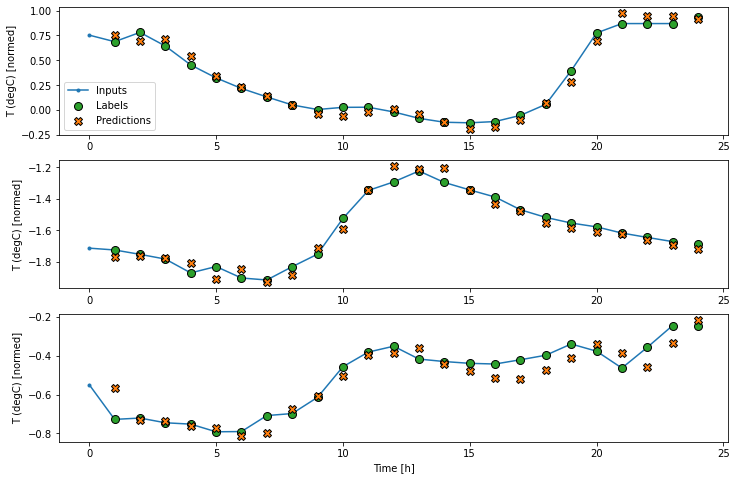

In [60]:
wide_window.plot(lstm_model) #Plotting prediction

**Multi-output models**

The models so far all predicted a single output feature, T (degC), for a single time step.
 All of these models can be converted to predict multiple features just by 
 changing the number of units in the output layer and adjusting the training 
 windows to include all features in the labels (example_labels)

In [61]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

#features axis of the labels now has the same depth as the inputs, instead of 1

Inputs shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


**Dense Model**

Here, all features are repeated instead of selecting a specific label_index

In [62]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [63]:
history = compile_and_fit(dense, single_step_window) # Compiling model

Epoch 1/100
1534/1534 [==============================] - 11s 7ms/step - loss: 0.1046 - mean_absolute_error: 0.1869 - val_loss: 0.0746 - val_mean_absolute_error: 0.1502
Epoch 2/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.1452 - val_loss: 0.0720 - val_mean_absolute_error: 0.1419
Epoch 3/100
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0713 - mean_absolute_error: 0.1403 - val_loss: 0.0705 - val_mean_absolute_error: 0.1385
Epoch 4/100
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.1374 - val_loss: 0.0697 - val_mean_absolute_error: 0.1350
Epoch 5/100
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0698 - mean_absolute_error: 0.1353 - val_loss: 0.0704 - val_mean_absolute_error: 0.1378
Epoch 6/100
1534/1534 [==============================] - 10s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.1340 - val_loss: 0.0694 - val_mean_absolute_error: 

**LSTM Model**

In [64]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window) #Compiling model


Epoch 1/100
1533/1533 [==============================] - 13s 8ms/step - loss: 0.1259 - mean_absolute_error: 0.2078 - val_loss: 0.0694 - val_mean_absolute_error: 0.1404
Epoch 2/100
1533/1533 [==============================] - 12s 8ms/step - loss: 0.0670 - mean_absolute_error: 0.1339 - val_loss: 0.0649 - val_mean_absolute_error: 0.1295
Epoch 3/100
1533/1533 [==============================] - 12s 8ms/step - loss: 0.0642 - mean_absolute_error: 0.1273 - val_loss: 0.0635 - val_mean_absolute_error: 0.1258
Epoch 4/100
1533/1533 [==============================] - 11s 7ms/step - loss: 0.0632 - mean_absolute_error: 0.1246 - val_loss: 0.0629 - val_mean_absolute_error: 0.1238
Epoch 5/100
1533/1533 [==============================] - 12s 8ms/step - loss: 0.0625 - mean_absolute_error: 0.1231 - val_loss: 0.0629 - val_mean_absolute_error: 0.1231
Epoch 6/100
1533/1533 [==============================] - 12s 8ms/step - loss: 0.0620 - mean_absolute_error: 0.1221 - val_loss: 0.0623 - val_mean_absolute_error:

**Multi-step models**

 Both the single-output and multiple-output models in the previous sections made 
 single time step predictions, one hour into the future.

 In a multi-step prediction, the model needs to learn to predict a range of future values. 
 Thus, unlike a single step model, where only a single future point is predicted, 
 a multi-step model predicts a sequence of the future values.

 Two approaches:

   a) Single shot predictions where the entire time series is predicted at once

   b) Autoregressive predictions where the model only makes single step predictions and 
      its output is fed back as its input.

 Here, the models will learn to predict 24 hours into the future, given 24 hours of the past.

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

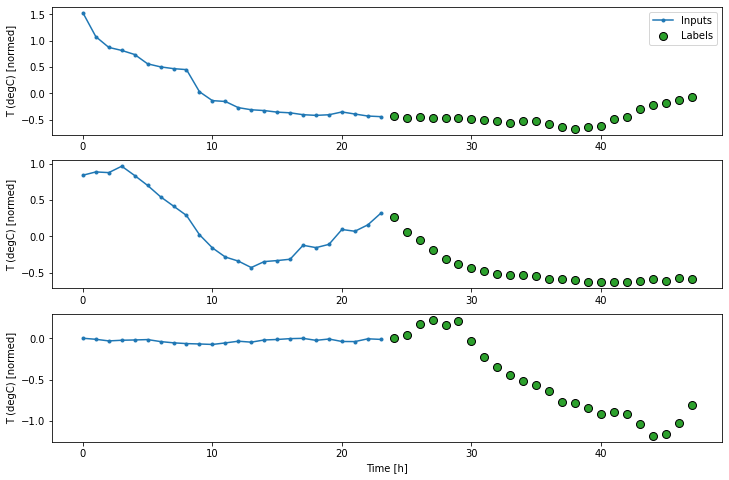

In [65]:
#Window object that generates these slices from the dataset
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

**Single-shot models**

Here, the model makes entire sequence prediction in a single step.

**Dense Model**

Adding a tf.keras.layers.Dense between the input and output gives the linear model more power.

In [66]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(64, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window) #Compiling the model

Epoch 1/100
1532/1532 [==============================] - 10s 7ms/step - loss: 0.2697 - mean_absolute_error: 0.3356 - val_loss: 0.2322 - val_mean_absolute_error: 0.2996
Epoch 2/100
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2286 - mean_absolute_error: 0.2951 - val_loss: 0.2287 - val_mean_absolute_error: 0.2946
Epoch 3/100
1532/1532 [==============================] - 9s 6ms/step - loss: 0.2257 - mean_absolute_error: 0.2913 - val_loss: 0.2263 - val_mean_absolute_error: 0.2922
Epoch 4/100
1532/1532 [==============================] - 9s 6ms/step - loss: 0.2240 - mean_absolute_error: 0.2893 - val_loss: 0.2252 - val_mean_absolute_error: 0.2906
Epoch 5/100
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2228 - mean_absolute_error: 0.2882 - val_loss: 0.2243 - val_mean_absolute_error: 0.2897
Epoch 6/100
1532/1532 [==============================] - 9s 6ms/step - loss: 0.2219 - mean_absolute_error: 0.2872 - val_loss: 0.2241 - val_mean_absolute_error: 0.

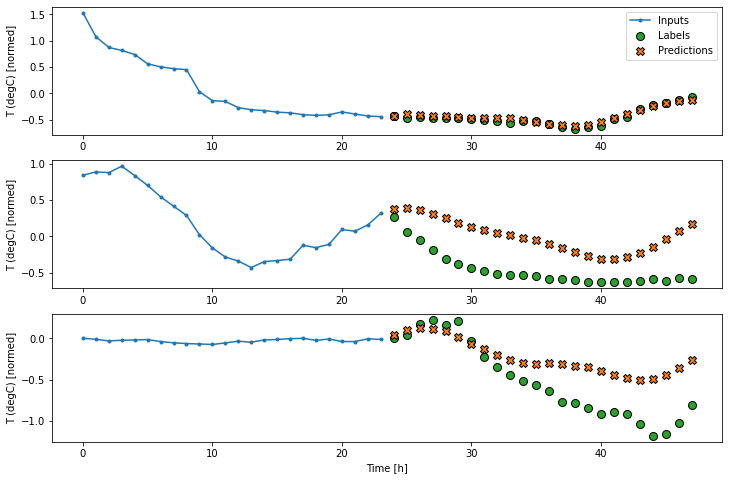

In [67]:
multi_window.plot(multi_dense_model) #Plotting Predictions

**CNN Model**

Makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time.

In [68]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    # this code works since the kernel size is given as CONV_WIDTH which will take care of the input.
    # Assume we are feeding a three time step information to the network, say [0, 1, 2]
    # The kernel size is set to 3. It can convert the input data into a feature map
    # When we visualize the data as time x temperature (the feature that we considered in this problem),
    # The conv1d layers considers the input data as something that comes in each time step.
    # It means that, irrespective of the no. of features, the conv1d function takes input as a 1-D quantity (consider time as input) 
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)), 
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window) #Compiling the model

Epoch 1/100
1532/1532 [==============================] - 11s 7ms/step - loss: 0.2423 - mean_absolute_error: 0.3104 - val_loss: 0.2257 - val_mean_absolute_error: 0.2946
Epoch 2/100
1532/1532 [==============================] - 10s 7ms/step - loss: 0.2203 - mean_absolute_error: 0.2880 - val_loss: 0.2198 - val_mean_absolute_error: 0.2860
Epoch 3/100
1532/1532 [==============================] - 9s 6ms/step - loss: 0.2165 - mean_absolute_error: 0.2840 - val_loss: 0.2175 - val_mean_absolute_error: 0.2848
Epoch 4/100
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2136 - mean_absolute_error: 0.2809 - val_loss: 0.2174 - val_mean_absolute_error: 0.2841
Epoch 5/100
1532/1532 [==============================] - 10s 7ms/step - loss: 0.2114 - mean_absolute_error: 0.2789 - val_loss: 0.2148 - val_mean_absolute_error: 0.2815
Epoch 6/100
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2096 - mean_absolute_error: 0.2773 - val_loss: 0.2144 - val_mean_absolute_error: 

In [69]:
multi_conv_model.summary() #Model summary

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 3, 19)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            14848     
                                                                 
 dense_16 (Dense)            (None, 1, 456)            117192    
                                                                 
 reshape_2 (Reshape)         (None, 24, 19)            0         
                                                                 
Total params: 132,040
Trainable params: 132,040
Non-trainable params: 0
_________________________________________________________________


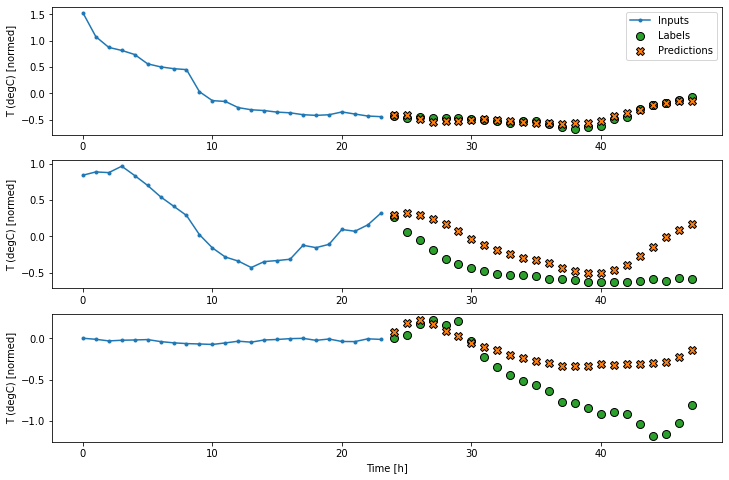

In [70]:
multi_window.plot(multi_conv_model) #Plotting model predictions

**LSTM**

In single-shot format, the LSTM only needs to produce an output at the last time step, so set return_sequences=False in tf.keras.layers.LSTM.

In [71]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window) # Compiling the model

Epoch 1/100
1532/1532 [==============================] - 14s 8ms/step - loss: 0.2921 - mean_absolute_error: 0.3626 - val_loss: 0.2296 - val_mean_absolute_error: 0.3055
Epoch 2/100
1532/1532 [==============================] - 11s 7ms/step - loss: 0.2169 - mean_absolute_error: 0.2939 - val_loss: 0.2202 - val_mean_absolute_error: 0.2940
Epoch 3/100
1532/1532 [==============================] - 12s 8ms/step - loss: 0.2099 - mean_absolute_error: 0.2855 - val_loss: 0.2172 - val_mean_absolute_error: 0.2893
Epoch 4/100
1532/1532 [==============================] - 12s 7ms/step - loss: 0.2059 - mean_absolute_error: 0.2813 - val_loss: 0.2154 - val_mean_absolute_error: 0.2872
Epoch 5/100
1532/1532 [==============================] - 12s 7ms/step - loss: 0.2030 - mean_absolute_error: 0.2786 - val_loss: 0.2136 - val_mean_absolute_error: 0.2850
Epoch 6/100
1532/1532 [==============================] - 11s 7ms/step - loss: 0.2006 - mean_absolute_error: 0.2765 - val_loss: 0.2139 - val_mean_absolute_error:

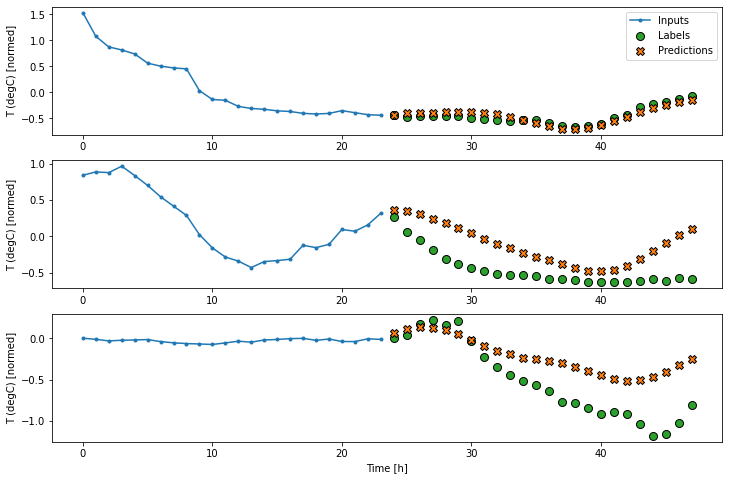

In [72]:
multi_window.plot(multi_lstm_model) #Plotting predictions

**Autoregressive model**

Advantage of autoregressive model is that, it can be set up to produce output with a varying length.Here the model only makes single step predictions and its output is fed back as its input.This is shown in the function below.

In [73]:
# Creating a class FeedBack
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [74]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

This model needs a warmup method to initialize its internal state based on the inputs. Once it gets trained, this state will capture the relevant parts of the input history.

In [75]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

With the RNN's state and an initial prediction, continue to iterate the model feeding the predictions at each step back as the input.

One approach for collecting the output predictions is to use a Python list and a tf.stack after the loop.

In [76]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [77]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape) #Test running the model on the example inputs

Output shape (batch, time, features):  (32, 24, 19)


In [78]:
history = compile_and_fit(feedback_model, multi_window) #Training the model

Epoch 1/100
1532/1532 [==============================] - 85s 53ms/step - loss: 0.3148 - mean_absolute_error: 0.3874 - val_loss: 0.2444 - val_mean_absolute_error: 0.3275
Epoch 2/100
1532/1532 [==============================] - 79s 52ms/step - loss: 0.2331 - mean_absolute_error: 0.3172 - val_loss: 0.2396 - val_mean_absolute_error: 0.3179
Epoch 3/100
1532/1532 [==============================] - 80s 52ms/step - loss: 0.2227 - mean_absolute_error: 0.3052 - val_loss: 0.2259 - val_mean_absolute_error: 0.3051
Epoch 4/100
1532/1532 [==============================] - 90s 59ms/step - loss: 0.2171 - mean_absolute_error: 0.2990 - val_loss: 0.2260 - val_mean_absolute_error: 0.3008
Epoch 5/100
1532/1532 [==============================] - 82s 53ms/step - loss: 0.2132 - mean_absolute_error: 0.2949 - val_loss: 0.2248 - val_mean_absolute_error: 0.2979
Epoch 6/100
1532/1532 [==============================] - 81s 53ms/step - loss: 0.2105 - mean_absolute_error: 0.2920 - val_loss: 0.2235 - val_mean_absolute_

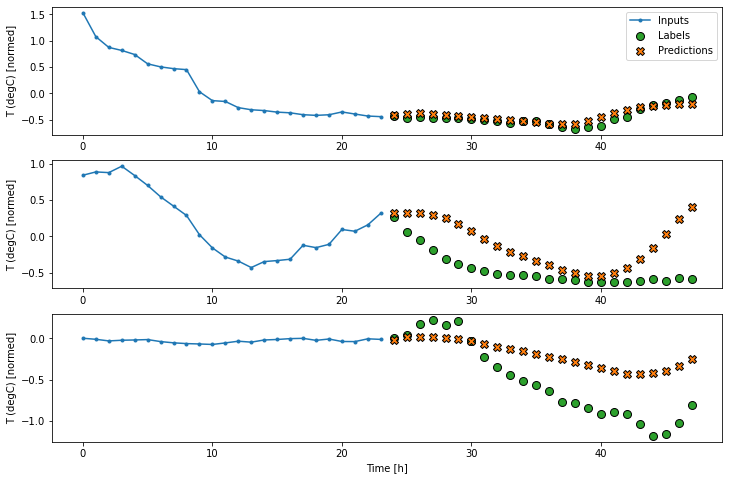

In [79]:
multi_window.plot(feedback_model) #Plotting predictions